In [ ]:
## This code mounts Google Drive in a Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/My Drive/kifiya5/complaints.csv")

/tmp/ipython-input-3-1083509708.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/My Drive/kifiya5/complaints.csv")


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

In [5]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else                          

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64


In [7]:
# Distribution of complaints by Product
product_distribution = df['Product'].value_counts()
product_percentage = df['Product'].value_counts(normalize=True) * 100


In [8]:
# Combine counts and percentages into a DataFrame
product_summary = pd.DataFrame({
    'Count': product_distribution,
    'Percentage': product_percentage
})
print("\nComplaint Distribution by Product:")
print(product_summary)



Complaint Distribution by Product:
                                                      Count  Percentage
Product                                                                
Credit reporting or other personal consumer rep...  4834855   50.311729
Credit reporting, credit repair services, or ot...  2163857   22.517198
Debt collection                                      799197    8.316482
Mortgage                                             422254    4.393995
Checking or savings account                          291178    3.030012
Credit card                                          226686    2.358905
Credit card or prepaid card                          206369    2.147486
Money transfer, virtual currency, or money service   145066    1.509564
Credit reporting                                     140429    1.461311
Student loan                                         109717    1.141720
Bank account or service                               86205    0.897053
Vehicle loan or lease       

In [9]:
# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-10-2136409899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_distribution.values, y=product_distribution.index, palette='viridis')


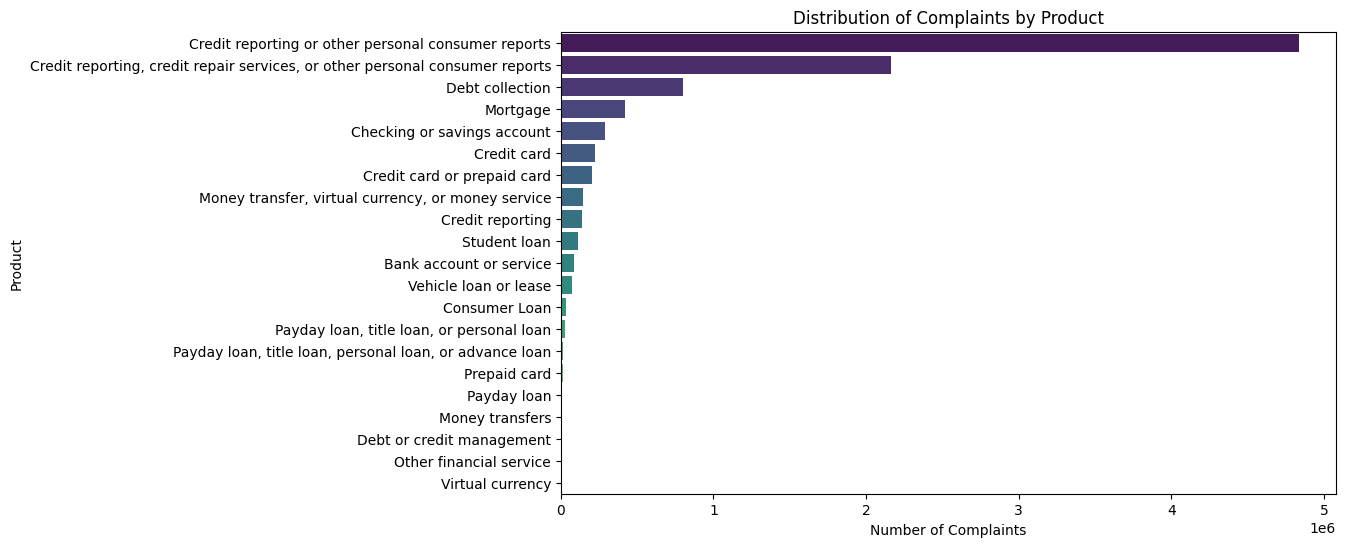

In [10]:

plt.figure(figsize=(10, 6))
sns.barplot(x=product_distribution.values, y=product_distribution.index, palette='viridis')
plt.title('Distribution of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()

In [11]:
# Calculate word count for narratives
df['Narrative_Word_Count'] = df['Consumer complaint narrative'].apply(
    lambda x: len(str(x).split()) if pd.notnull(x) else 0
)

# Summary statistics for narrative length
print("\nNarrative Word Count Statistics:")
print(df['Narrative_Word_Count'].describe())



Narrative Word Count Statistics:
count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: Narrative_Word_Count, dtype: float64


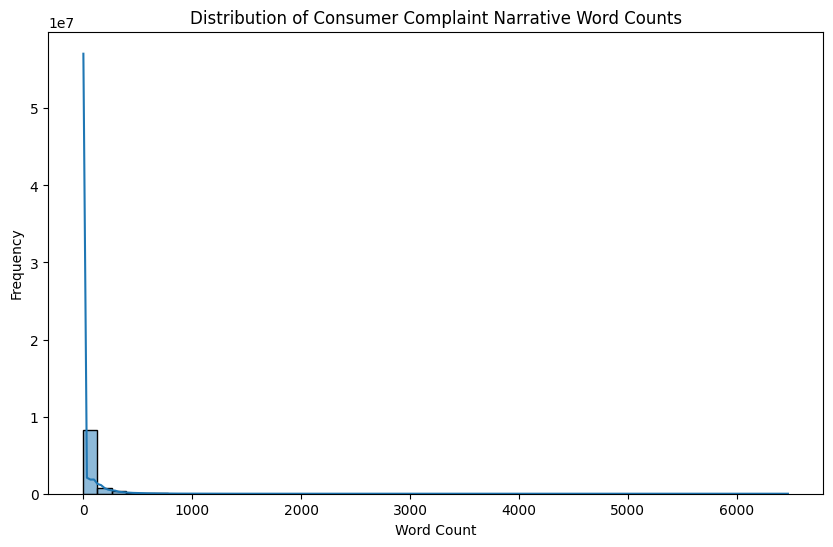

In [12]:

# Visualize the distribution of narrative lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Narrative_Word_Count'], bins=50, kde=True)
plt.title('Distribution of Consumer Complaint Narrative Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Identify very short or very long narratives
short_narratives = df[df['Narrative_Word_Count'] < 10]['Narrative_Word_Count'].count()
long_narratives = df[df['Narrative_Word_Count'] > 500]['Narrative_Word_Count'].count()
print(f"Number of very short narratives (<10 words): {short_narratives}")
print(f"Number of very long narratives (>500 words): {long_narratives}")

#This step will provide insights into the range of narrative lengths, highlighting whether there are extremely brief (e.g., <10 words) or excessively long
#(e.g., >500 words) narratives that may affect embedding quality in the RAG pipeline.

Number of very short narratives (<10 words): 6650979
Number of very long narratives (>500 words): 160989



Complaints with narratives: 2980756 (31.02%)
Complaints without narratives: 6629041 (68.98%)


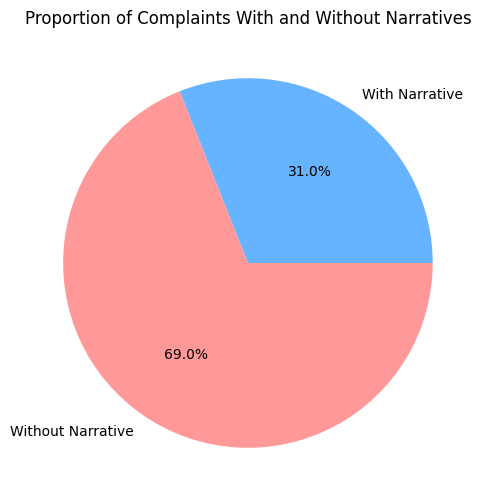

In [14]:
# Count complaints with and without narratives
with_narratives = df['Consumer complaint narrative'].notnull().sum()
without_narratives = df['Consumer complaint narrative'].isnull().sum()
total_complaints = len(df)

print(f"\nComplaints with narratives: {with_narratives} ({with_narratives/total_complaints*100:.2f}%)")
print(f"Complaints without narratives: {without_narratives} ({without_narratives/total_complaints*100:.2f}%)")

# Visualize the proportion
plt.figure(figsize=(6, 6))
plt.pie([with_narratives, without_narratives], labels=['With Narrative', 'Without Narrative'],
        autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Proportion of Complaints With and Without Narratives')
plt.show()